<a href="https://colab.research.google.com/github/ishnt/Projects-and-Coursework/blob/main/infosys_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
key="395e9b7dd78e633ab528066c2f3472a99c7b51a0"

In [ ]:
df = pdr.get_data_tiingo('INFY', api_key=key)

TypeError: concat() takes 1 positional argument but 2 were given

In [ ]:

df.to_csv('INFY.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('INFY.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,INFY,2019-02-28 00:00:00+00:00,10.72,10.77,10.65,10.69,6815014,9.529183,9.573629,9.466959,9.502516,6815014,0.0,1.0
1,INFY,2019-03-01 00:00:00+00:00,10.84,10.87,10.74,10.79,8012050,9.635853,9.662520,9.546961,9.591407,8012050,0.0,1.0
2,INFY,2019-03-04 00:00:00+00:00,10.72,10.87,10.66,10.85,5650944,9.529183,9.662520,9.475848,9.644742,5650944,0.0,1.0
3,INFY,2019-03-05 00:00:00+00:00,10.77,10.80,10.65,10.72,5575961,9.573629,9.600296,9.466959,9.529183,5575961,0.0,1.0
4,INFY,2019-03-06 00:00:00+00:00,10.71,10.75,10.68,10.70,6026570,9.520294,9.555851,9.493626,9.511405,6026570,0.0,1.0


In [ ]:

df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,INFY,2024-02-16 00:00:00+00:00,20.47,20.58,20.26,20.35,5516570,20.47,20.58,20.26,20.35,5516570,0.0,1.0
1253,INFY,2024-02-20 00:00:00+00:00,20.02,20.40,19.99,20.28,7587353,20.02,20.40,19.99,20.28,7587353,0.0,1.0
1254,INFY,2024-02-21 00:00:00+00:00,19.78,19.94,19.68,19.79,6192511,19.78,19.94,19.68,19.79,6192511,0.0,1.0
1255,INFY,2024-02-22 00:00:00+00:00,20.31,20.36,20.14,20.20,6590221,20.31,20.36,20.14,20.20,6590221,0.0,1.0
1256,INFY,2024-02-23 00:00:00+00:00,20.11,20.26,20.10,20.21,4228250,20.11,20.26,20.10,20.21,4228250,0.0,1.0


In [ ]:

df1=df.reset_index()['close']

In [ ]:
df1

0       10.70
1       10.72
2       10.84
3       10.72
4       10.77
        ...  
1252    20.47
1253    20.02
1254    19.78
1255    20.31
1256    20.11
Name: close, Length: 1257, dtype: float64

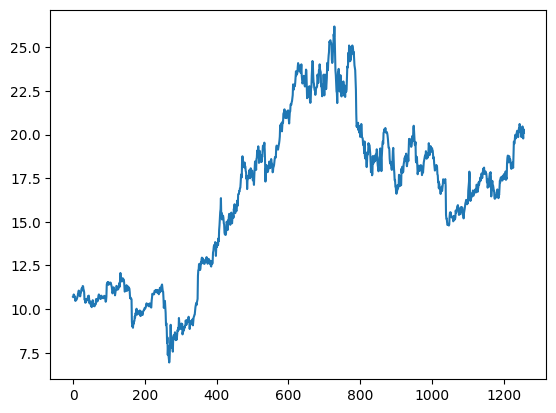

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:

df1

0       10.70
1       10.72
2       10.84
3       10.72
4       10.77
        ...  
1252    20.47
1253    20.02
1254    19.78
1255    20.31
1256    20.11
Name: close, Length: 1257, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:

training_size,test_size

(817, 440)

In [ ]:
train_data

array([[0.19522326],
       [0.19626168],
       [0.20249221],
       [0.19626168],
       [0.19885774],
       [0.19574247],
       [0.18431983],
       [0.18328141],
       [0.1874351 ],
       [0.18587747],
       [0.1874351 ],
       [0.19003115],
       [0.19522326],
       [0.19626168],
       [0.20560748],
       [0.20768432],
       [0.21391485],
       [0.20456906],
       [0.20145379],
       [0.20145379],
       [0.19678089],
       [0.20456906],
       [0.20716511],
       [0.21547248],
       [0.22014538],
       [0.2211838 ],
       [0.21443406],
       [0.22741433],
       [0.22689512],
       [0.21858775],
       [0.21495327],
       [0.20924195],
       [0.1874351 ],
       [0.18847352],
       [0.1780893 ],
       [0.18016615],
       [0.17912773],
       [0.18224299],
       [0.18639668],
       [0.18899273],
       [0.18587747],
       [0.19262721],
       [0.19781931],
       [0.19833853],
       [0.19885774],
       [0.18847352],
       [0.17601246],
       [0.182

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:

print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 359ms/step - loss: 0.0786 - val_loss: 0.0045
Epoch 2/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0131 - val_loss: 0.0124
Epoch 3/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0063 - val_loss: 0.0016
Epoch 4/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 5/100
12/12 [==============================] - 3s 286ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 6/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 8/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 9/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 10/100
12/12 [==============================] - 3s 274ms/step - loss: 0.0023 - val_l

In [ ]:
import tensorflow as tf

In [ ]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 38ms/step


In [ ]:


##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


16.422884667268622

In [ ]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

17.054225964656684

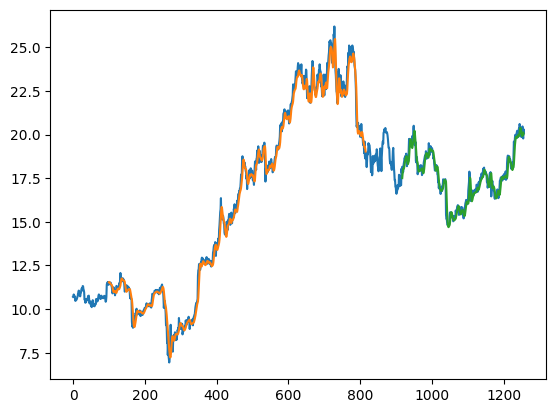

In [ ]:

### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:

x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:

temp_input

[0.5316718587746626,
 0.5223260643821392,
 0.5451713395638631,
 0.5539979231568017,
 0.563343717549325,
 0.5612668743509865,
 0.566458982346833,
 0.5539979231568017,
 0.49428868120456915,
 0.5171339563862928,
 0.5332294911734166,
 0.5404984423676014,
 0.529595015576324,
 0.5269989615784009,
 0.5207684319833853,
 0.5109034267912774,
 0.5109034267912774,
 0.490134994807892,
 0.48701973001038423,
 0.4932502596053999,
 0.4963655244029076,
 0.4922118380062307,
 0.49117341640706125,
 0.5062305295950157,
 0.505711318795431,
 0.5150571131879543,
 0.5114226375908619,
 0.5051921079958465,
 0.4890965732087228,
 0.5031152647975078,
 0.4989615784008309,
 0.5181723779854622,
 0.5410176531671859,
 0.5363447559709242,
 0.5488058151609555,
 0.5503634475597092,
 0.5451713395638631,
 0.5524402907580478,
 0.5467289719626168,
 0.5415368639667706,
 0.555036344755971,
 0.5545171339563864,
 0.550882658359294,
 0.5602284527518173,
 0.5581516095534789,
 0.5462097611630323,
 0.5581516095534789,
 0.55555555555555

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.49896158 0.51817238 0.54101765 0.53634476 0.54880582 0.55036345
 0.54517134 0.55244029 0.54672897 0.54153686 0.55503634 0.55451713
 0.55088266 0.56022845 0.55815161 0.54620976 0.55815161 0.55555556
 0.56853583 0.54361371 0.55088266 0.54672897 0.59345794 0.60903427
 0.61578401 0.6152648  0.596054   0.59553479 0.61370717 0.59761163
 0.60539979 0.60332295 0.59397715 0.57840083 0.57632399 0.57788162
 0.57943925 0.59501558 0.58722741 0.57943925 0.61682243 0.65732087
 0.65057113 0.65420561 0.66926272 0.67757009 0.67133956 0.66718588
 0.67757009 0.6827622  0.68951194 0.68691589 0.67549325 0.67082035
 0.68795431 0.69626168 0.69366563 0.70976116 0.70041537 0.68795431
 0.68328141 0.68535826 0.67082035 0.6874351  0.69418484 0.70249221
 0.67912773 0.66666667 0.69418484 0.68380062 0.67722541 0.67570204
 0.67319894 0.67025024 0.66716617 0.66409111 0.66109461 0.65821493
 0.65547556 0.65288895 0.6504575  0.64817643 0.64603531 0.64402032
 0.6421175  0.64031237 0.63859349 0.63695097 0.635

In [ ]:

day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [ ]:
import matplotlib.pyplot as plt

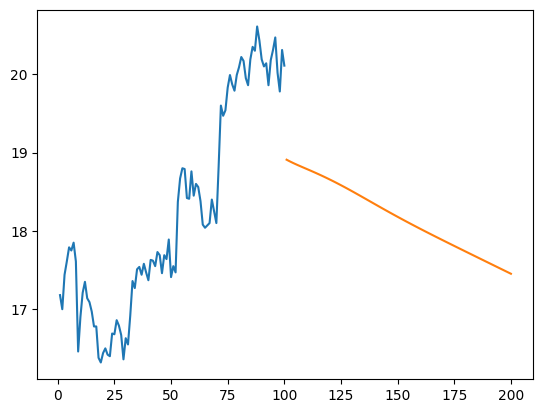

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

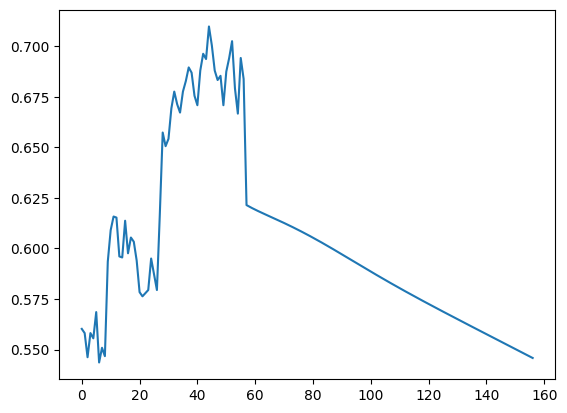

In [ ]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:

df3=scaler.inverse_transform(df3).tolist()

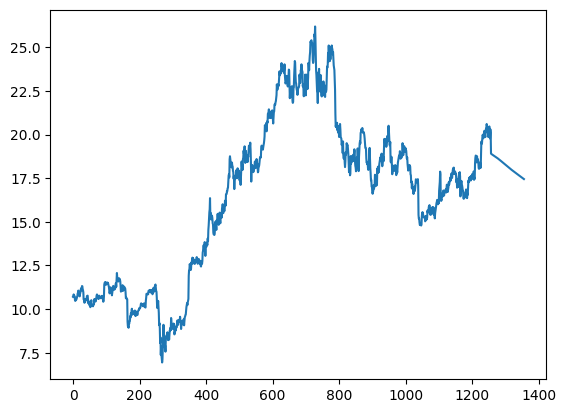

In [ ]:

plt.plot(df3)